In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing customer and credit card datasets
cc = pd.read_csv('/Users/twinklejain/Desktop/Data Analysis Project/Bank Credit Card Analysis/credit_card.csv')
cust = pd.read_csv('/Users/twinklejain/Desktop/Data Analysis Project/Bank Credit Card Analysis/customer.csv')

In [3]:
#Viewing the first 5 rows for credit card dataset
cc.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [4]:
#Viewing the first 5 rows for customer dataset
cust.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


# Data Cleaning

In [5]:
#Checking for missing values

print(cust.isnull().sum())
print(cc.isnull().sum())



Client_Num                 0
Customer_Age               0
Gender                     0
Dependent_Count            0
Education_Level            0
Marital_Status             0
state_cd                   0
Zipcode                    0
Car_Owner                  0
House_Owner                0
Personal_loan              0
contact                    0
Customer_Job               0
Income                     0
Cust_Satisfaction_Score    0
dtype: int64
Client_Num               0
Card_Category            0
Annual_Fees              0
Activation_30_Days       0
Customer_Acq_Cost        0
Week_Start_Date          0
Week_Num                 0
Qtr                      0
current_year             0
Credit_Limit             0
Total_Revolving_Bal      0
Total_Trans_Amt          0
Total_Trans_Vol          0
Avg_Utilization_Ratio    0
Use Chip                 0
Exp Type                 0
Interest_Earned          0
Delinquent_Acc           0
dtype: int64


In [6]:
# Summary statistics
print(cust.describe())
print(cc.describe())

         Client_Num  Customer_Age  Dependent_Count       Zipcode  \
count  1.010800e+04  10108.000000     10108.000000  10108.000000   
mean   7.390104e+08     46.274436         2.345370  91663.071824   
std    3.673623e+07      8.087876         1.299486   1693.093868   
min    7.080821e+08     21.000000         0.000000  53010.000000   
25%    7.130267e+08     41.000000         1.000000  91750.000000   
50%    7.179037e+08     46.000000         2.000000  91750.000000   
75%    7.727989e+08     52.000000         3.000000  91750.000000   
max    8.278908e+08     73.000000         5.000000  99504.000000   

              Income  Cust_Satisfaction_Score  
count   10108.000000             10108.000000  
mean    56976.101998                 3.189256  
std     46183.718233                 1.263101  
min      1250.000000                 1.000000  
25%     22635.750000                 2.000000  
50%     44768.500000                 3.000000  
75%     76392.750000                 4.000000  
max

In [7]:
# Display information about the customer DataFrame
print("Customer DataFrame Info:")
cust.info()

# Display information about the credit card DataFrame
print("\nCredit Card DataFrame Info:")
cc.info()

Customer DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Client_Num               10108 non-null  int64 
 1   Customer_Age             10108 non-null  int64 
 2   Gender                   10108 non-null  object
 3   Dependent_Count          10108 non-null  int64 
 4   Education_Level          10108 non-null  object
 5   Marital_Status           10108 non-null  object
 6   state_cd                 10108 non-null  object
 7   Zipcode                  10108 non-null  int64 
 8   Car_Owner                10108 non-null  object
 9   House_Owner              10108 non-null  object
 10  Personal_loan            10108 non-null  object
 11  contact                  10108 non-null  object
 12  Customer_Job             10108 non-null  object
 13  Income                   10108 non-null  int64 
 14  Cust_Satisfac

In [8]:
#Creating a new column Age Group based on Customer_Age using apply method

def val(d):
    if d['Customer_Age'] < 30:
        return "<30"
    elif d['Customer_Age'] >= 30 and d['Customer_Age'] < 40:
        return "30-40"
    elif d['Customer_Age'] >=40 and d['Customer_Age'] < 50:
        return "40-50"
    elif d['Customer_Age'] >=50 and d['Customer_Age'] < 60:
        return "50-60"
    elif d['Customer_Age'] >=60:
        return ">=60"

cust['Age_Group'] = cust.apply(val, axis =1)

cust.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score,Age_Group
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3,<30
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2,>=60
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2,30-40
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1,30-40
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1,40-50


In [10]:
#Creating a new column Income_Group based on Income column using apply method
def val(d):
    if d['Income'] < 35000:
        return "Low"
    elif d['Income'] >=35000 and d['Income'] <70000:
        return "Medium"
    elif d['Income'] >=70000:
        return "High"

cust['Income_Group'] = cust.apply(val, axis =1)

cust.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score,Age_Group,Income_Group
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3,<30,High
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2,>=60,Low
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2,30-40,Low
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1,30-40,Medium
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1,40-50,Medium


In [11]:
# Creating a new column Total_Revenue in the credit card dataset
cc['Total_Revenue'] = cc['Annual_Fees'] + cc['Total_Trans_Amt'] + cc['Interest_Earned']
cc.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Total_Revenue
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0,19742.21
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0,1506.44
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0,1789.58
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0,4426.40
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1,5693.87


In [12]:
cc['Week_No.'] = cc['Week_Num'].apply(lambda x: x.split('-')[1])

cc.head()


,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Total_Revenue,Week_No.
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0,19742.21,1
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0,1506.44,1
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0,1789.58,1
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0,4426.40,1
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1,5693.87,1


# Basic Insights

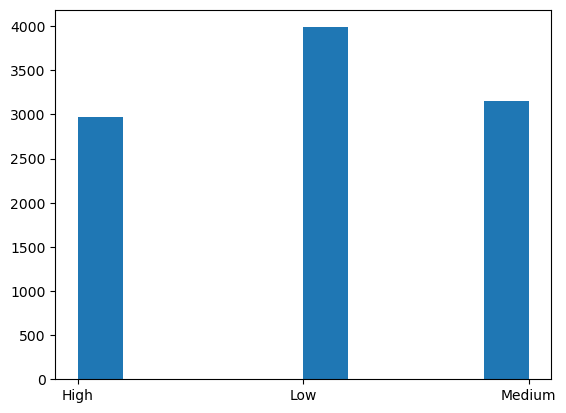

In [13]:

plt.hist(cust.Income_Group);

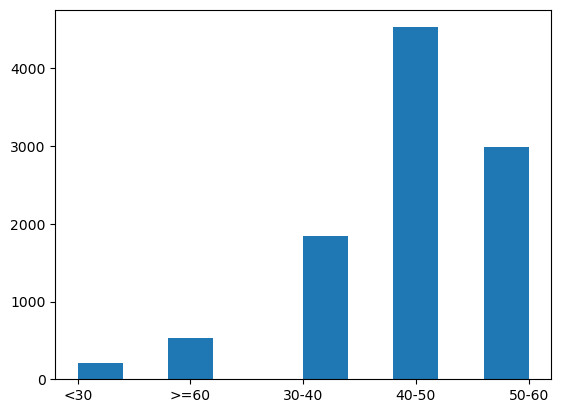

In [14]:
plt.hist(cust.Age_Group);

/var/folders/cq/r95733l13gs1w5n9m6yt6_mh0000gn/T/ipykernel_74246/2144982214.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust.Customer_Age);


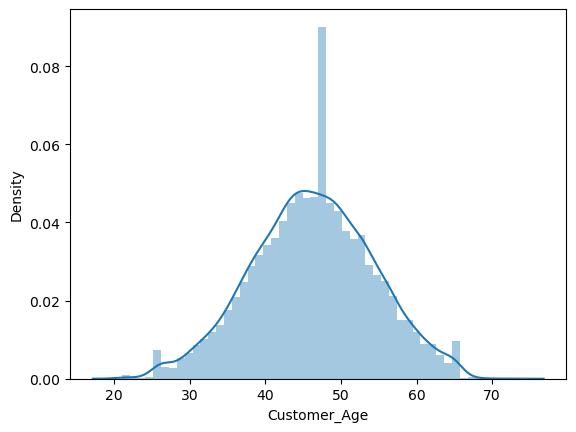

In [15]:

sns.distplot(cust.Customer_Age);

In [16]:

cc.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Num             10108 non-null  int64  
 1   Card_Category          10108 non-null  object 
 2   Annual_Fees            10108 non-null  int64  
 3   Activation_30_Days     10108 non-null  int64  
 4   Customer_Acq_Cost      10108 non-null  int64  
 5   Week_Start_Date        10108 non-null  object 
 6   Week_Num               10108 non-null  object 
 7   Qtr                    10108 non-null  object 
 8   current_year           10108 non-null  int64  
 9   Credit_Limit           10108 non-null  float64
 10  Total_Revolving_Bal    10108 non-null  int64  
 11  Total_Trans_Amt        10108 non-null  int64  
 12  Total_Trans_Vol        10108 non-null  int64  
 13  Avg_Utilization_Ratio  10108 non-null  float64
 14  Use Chip               10108 non-null  object 
 15  Ex

In [17]:
result= cc.groupby('Qtr').sum()
print(result)

        Client_Num  Annual_Fees  Activation_30_Days  Customer_Acq_Cost  \
Qtr                                                                      
Q1   1800745128072       749750                1422             242346   
Q2   1813498900155       738585                1444             243889   
Q3   1860792880680       741360                1481             244555   
Q4   1994880452607       720320                1462             242146   

     current_year  Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  \
Qtr                                                                     
Q1        5126282    21710877.3              2922827         11250588   
Q2        5128305    21509721.7              2942034         11135301   
Q3        5128305    22063612.8              2992833         11449700   
Q4        5065592    22004865.7              2895809         10686424   

     Total_Trans_Vol  Avg_Utilization_Ratio  Interest_Earned  Delinquent_Acc  \
Qtr                                 

/var/folders/cq/r95733l13gs1w5n9m6yt6_mh0000gn/T/ipykernel_74246/2525149434.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result= cc.groupby('Qtr').sum()


([<matplotlib.axis.XTick at 0x16dc01e90>,
 [Text(0.0, 0, 'Q1'),
  Text(1.0, 0, 'Q2'),
  Text(2.0, 0, 'Q3'),
  Text(3.0, 0, 'Q4')])

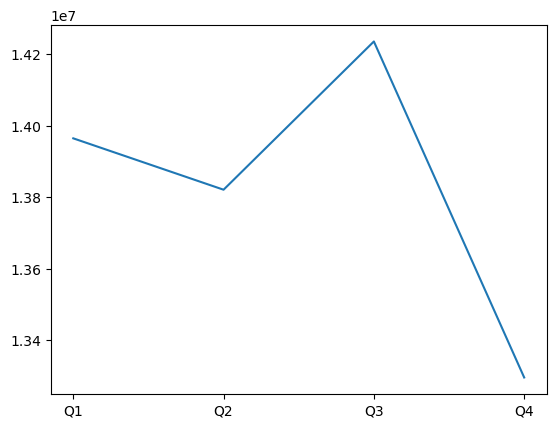

In [18]:
Q = cc.Qtr.unique() 

plt.plot(Q, result['Total_Revenue'])
plt.xticks(Q)

In [19]:

cc.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Total_Revenue,Week_No.
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0,19742.21,1
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0,1506.44,1
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0,1789.58,1
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0,4426.40,1
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1,5693.87,1


In [20]:

result=cc.groupby('Card_Category').sum()

result

/var/folders/cq/r95733l13gs1w5n9m6yt6_mh0000gn/T/ipykernel_74246/382955534.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=cc.groupby('Card_Category').sum()


,Client_Num,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc,Total_Revenue
Card_Category,,,,,,,,,,,,,
Blue,6809069524512,2685635,5270,887973,18639922,67130051.5,10616925,36957875,581338,2691.976,6495887.74,559,46139397.74
Gold,138822974154,56210,106,17542,380324,4109273.0,257031,2024078,18224,23.327,373784.16,12,2454072.16
Platinum,48902189286,20665,39,6570,135541,1102494.0,92964,953314,7490,10.132,161629.05,4,1135608.05
Silver,473122673562,187505,394,60851,1292697,14947259.0,786583,4586746,48599,52.757,812081.28,39,5586332.28


/var/folders/cq/r95733l13gs1w5n9m6yt6_mh0000gn/T/ipykernel_74246/2862129649.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=cc.groupby('Card_Category').sum()


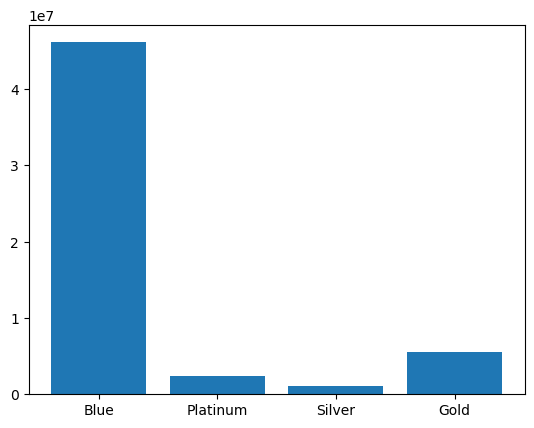

In [21]:
result=cc.groupby('Card_Category').sum()

category = cc['Card_Category'].unique()

plt.bar(category, result['Total_Revenue'])

plt.xticks(category) 

plt.show()

In [22]:
cust['Revenue'] = cc['Total_Revenue']
     

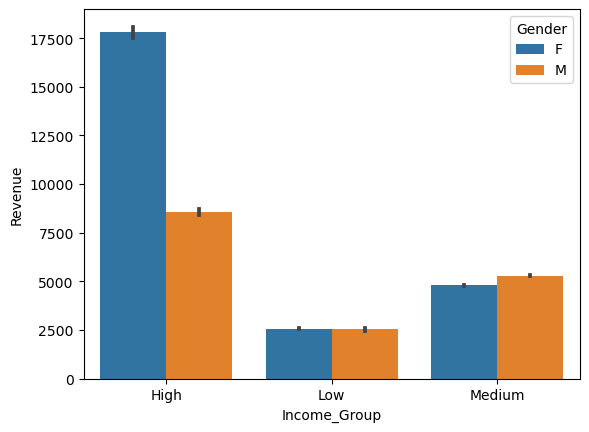

In [23]:
sns.barplot(x=cust.Income_Group, y=cust.Revenue, hue=cust.Gender);

In [24]:

cust.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score,Age_Group,Income_Group,Revenue
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3,<30,High,19742.21
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2,>=60,Low,1506.44
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2,30-40,Low,1789.58
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1,30-40,Medium,4426.40
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1,40-50,Medium,5693.87


In [25]:

cc.head()


,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Total_Revenue,Week_No.
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0,19742.21,1
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0,1506.44,1
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0,1789.58,1
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0,4426.40,1
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1,5693.87,1


In [26]:
w= cc['Qtr'].unique
w
    

<bound method Series.unique of 0        Q1
1        Q1
2        Q1
3        Q1
4        Q1
         ..
10103    Q4
10104    Q4
10105    Q4
10106    Q4
10107    Q4
Name: Qtr, Length: 10108, dtype: object>

<Axes: xlabel='Qtr', ylabel='Total_Revenue'>

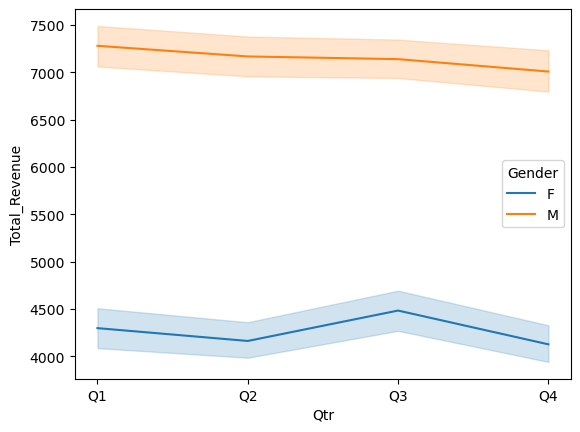

In [27]:
sns.lineplot(x= cc.Qtr,y= cc.Total_Revenue, hue= cust. Gender) 
     

In [28]:

result

,Client_Num,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc,Total_Revenue
Card_Category,,,,,,,,,,,,,
Blue,6809069524512,2685635,5270,887973,18639922,67130051.5,10616925,36957875,581338,2691.976,6495887.74,559,46139397.74
Gold,138822974154,56210,106,17542,380324,4109273.0,257031,2024078,18224,23.327,373784.16,12,2454072.16
Platinum,48902189286,20665,39,6570,135541,1102494.0,92964,953314,7490,10.132,161629.05,4,1135608.05
Silver,473122673562,187505,394,60851,1292697,14947259.0,786583,4586746,48599,52.757,812081.28,39,5586332.28


([<matplotlib.patches.Wedge at 0x16dd9f690>,
 [Text(-1.0407002504518528, 0.5974470593361816, 'Blue'),
  Text(0.7431925849665428, -0.9421596370311924, 'Platinum'),
  Text(0.9185538928635727, -0.772177923735959, 'Silver'),
  Text(1.1401084181007262, -0.3743698638724276, 'Gold')],
 [Text(-0.6070751460969142, 0.3485107846127725, '83%'),
  Text(0.43352900789715, -0.5495931216015288, '4%'),
  Text(0.5358231041704173, -0.4504371221793093, '2%'),
  Text(0.6650632438920902, -0.21838242059224944, '10%')])

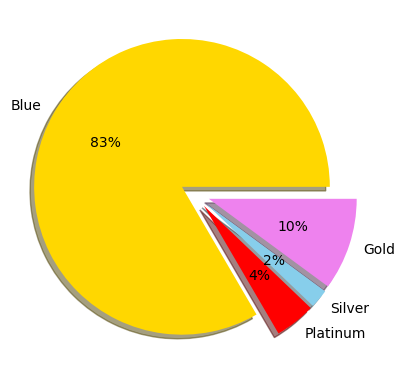

In [29]:
plt.pie(result['Total_Revenue'],labels=category,autopct= '%1.0f%%',colors=['Gold', 'Red','Skyblue','Violet'], explode=(0.1,0.1,0.1,0.1),shadow=True)



#cc['Total_Revenue'].plot.pie(labels=category, autopct='%1.0f%%', colors=['Gold', 'Red', 'Skyblue', 'Violet'], explode=(0.1, 0.1, 0.1, 0.1), figsize=(7, 7))
     

<Axes: ylabel='Gender'>

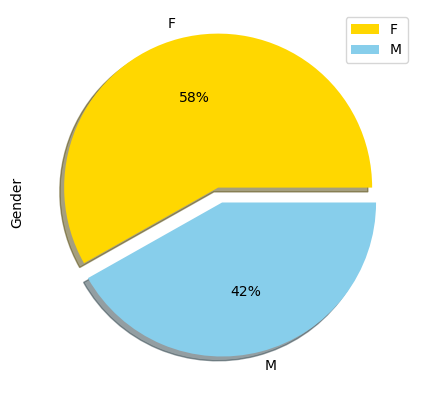

In [31]:
cust['Gender'].value_counts().plot.pie(figsize=(5,5), autopct='%1.0f%%',legend=True, shadow=True, explode=(0.1,0), colors=['gold', 'skyblue']) 
     

<Axes: ylabel='Card_Category'>

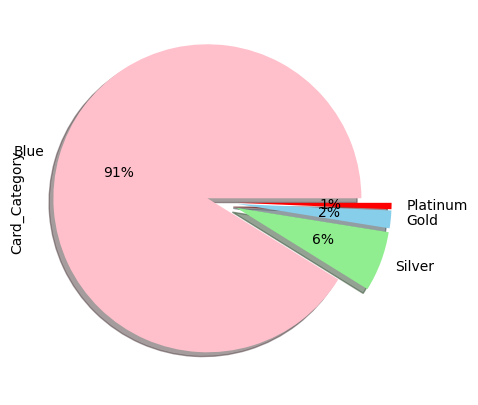

In [32]:
 cc['Card_Category'].value_counts().plot.pie(figsize=(5,5), autopct='%1.0f%%', shadow=True, explode=(0.1,0.1,0.1,0.1), colors=['pink', 'lightgreen', 'skyblue','red'])
     

In [33]:
cc['current_year'].unique

<bound method Series.unique of 0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
10103    2023
10104    2023
10105    2023
10106    2023
10107    2023
Name: current_year, Length: 10108, dtype: int64>

In [34]:

cust.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score,Age_Group,Income_Group,Revenue
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3,<30,High,19742.21
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2,>=60,Low,1506.44
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2,30-40,Low,1789.58
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1,30-40,Medium,4426.40
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1,40-50,Medium,5693.87


# 1. Card Category Distribution

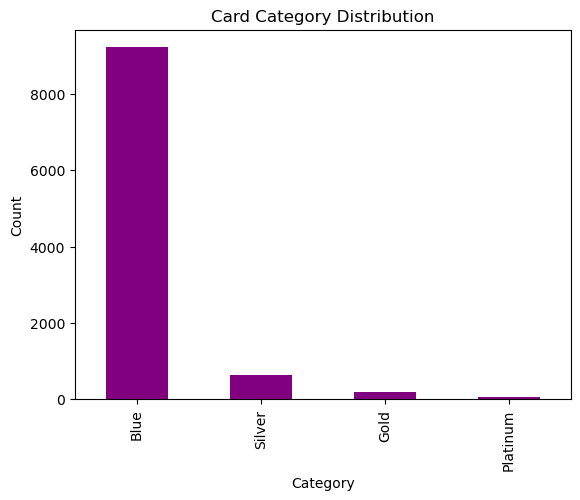

In [35]:
cc['Card_Category'].value_counts().plot(kind='bar', color='Purple')
plt.title('Card Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 2. Gender Distribution Across Card Categories

In [36]:
cust['Card_Category'] = cc['Card_Category']

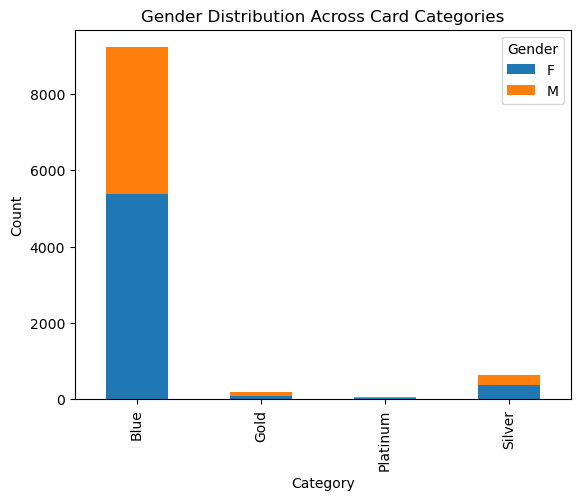

In [37]:
cust.groupby(['Card_Category','Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Card Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 3. Activation 30 days with card category & Gender

In [38]:
# Merge two data frames cust & cc

# Assuming you have the following DataFrames:
# cust = pd.read_csv('customer_details.csv')  # Customer details DataFrame
# cc = pd.read_csv('credit_card_details.csv')  # Credit card details DataFrame
# Merge the two DataFrames on Client ID

merged = pd.merge(cc, cust[['Client_Num', 'Gender']], on='Client_Num')

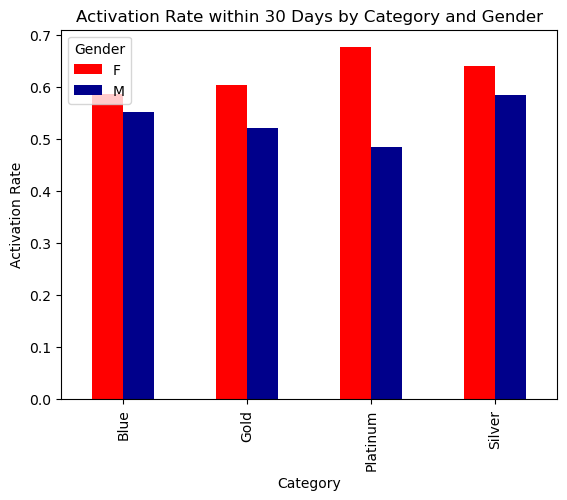

In [39]:
activation_rate = merged.groupby(['Card_Category', 'Gender'])['Activation_30_Days'].mean().unstack()
activation_rate.plot(kind='bar', color=['Red', 'darkblue'])
plt.title('Activation Rate within 30 Days by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Activation Rate')
plt.show()

# 4. Customer Acquisition Cost by Card Category.

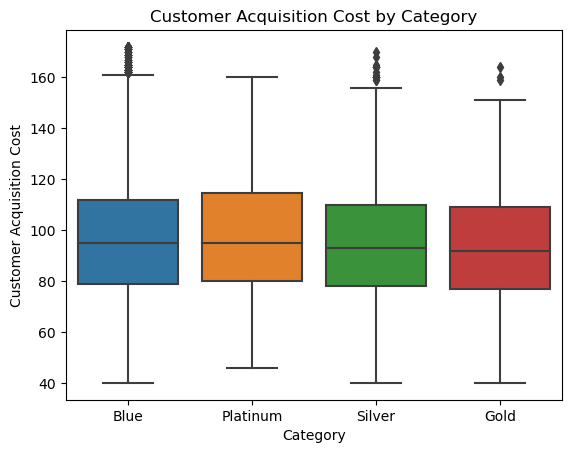

In [40]:
sns.boxplot(x='Card_Category', y='Customer_Acq_Cost', data=cc)
plt.title('Customer Acquisition Cost by Category')
plt.xlabel('Category')
plt.ylabel('Customer Acquisition Cost')
plt.show()

# 5. Current Year Credit Limit Distribution


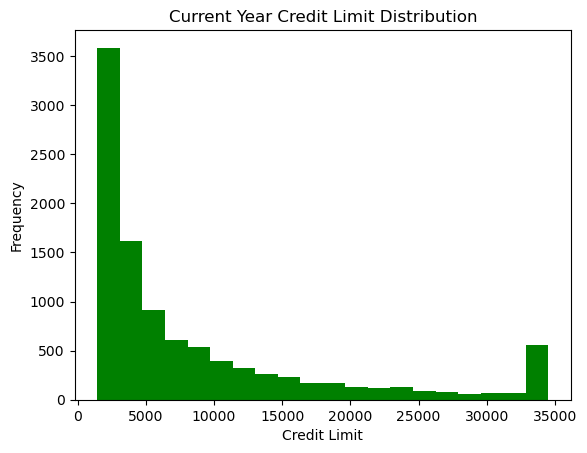

In [42]:
cc['Credit_Limit'].plot(kind='hist', bins=20, color='green')
plt.title('Current Year Credit Limit Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

# 6. Total Revolving balance by category

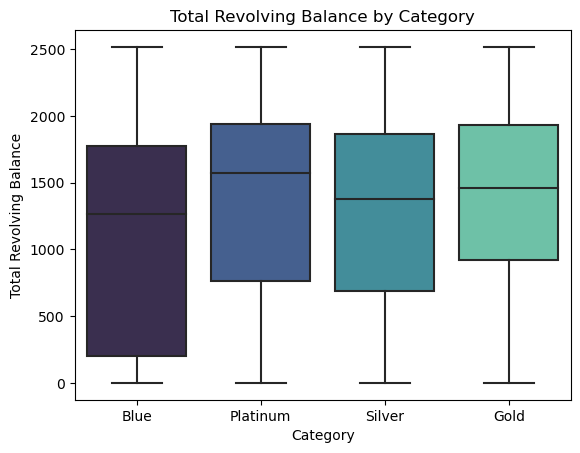

In [43]:
sns.boxplot(x='Card_Category', y='Total_Revolving_Bal', data=cc, palette="mako")
plt.title('Total Revolving Balance by Category')
plt.xlabel('Category')
plt.ylabel('Total Revolving Balance')
plt.show()

# 7. Average Utilization Ratio by card category

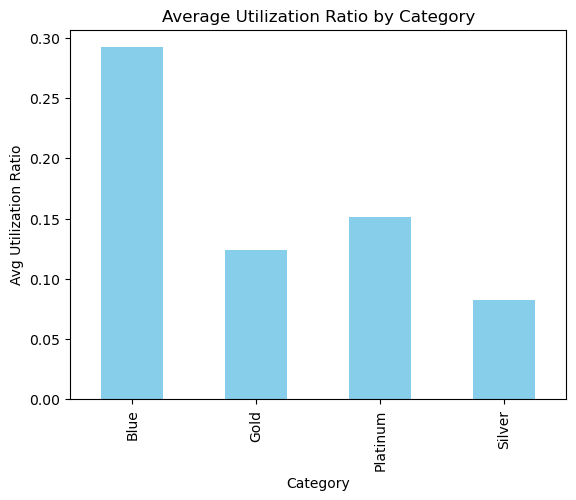

In [44]:
cc.groupby('Card_Category')['Avg_Utilization_Ratio'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Utilization Ratio by Category')
plt.xlabel('Category')
plt.ylabel('Avg Utilization Ratio')
plt.show()

# 8. Chip Usage Rate by Category & Gender

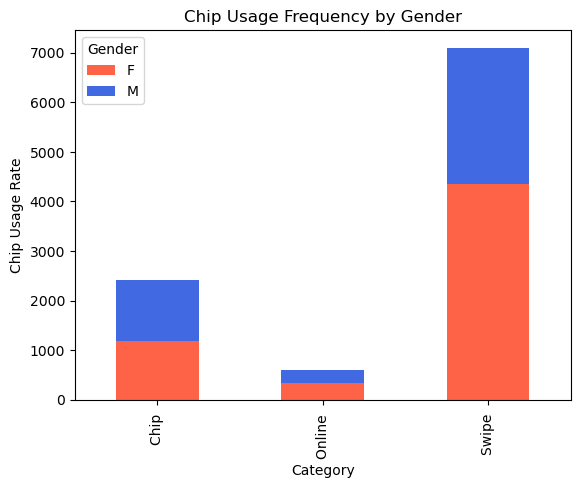

In [45]:
chip_usage = merged.groupby(['Use Chip', 'Gender']).size().unstack()
chip_usage.plot(kind='bar', stacked=True, color=['tomato', 'royalblue'])
plt.title('Chip Usage Frequency by Gender')
plt.xlabel('Category')
plt.ylabel('Chip Usage Rate')
plt.show()

# 9. Chip usage frequency as per Card Category

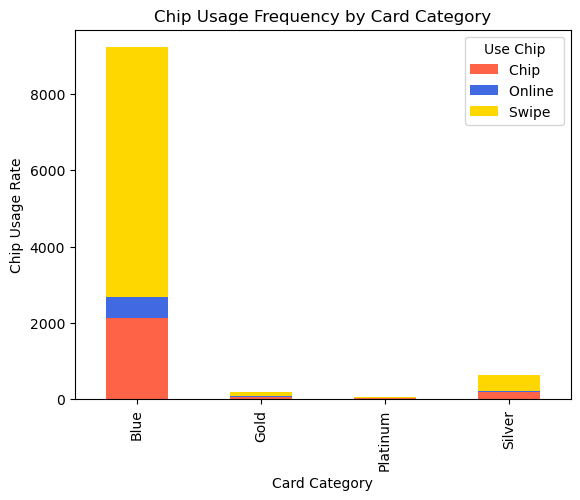

In [46]:
chip_usage = merged.groupby(['Card_Category','Use Chip']).size().unstack()
chip_usage.plot(kind='bar', stacked=True, color=['tomato', 'royalblue','gold'])
plt.title('Chip Usage Frequency by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Chip Usage Rate')
plt.show()

# 10. Expenditure Type Distribution

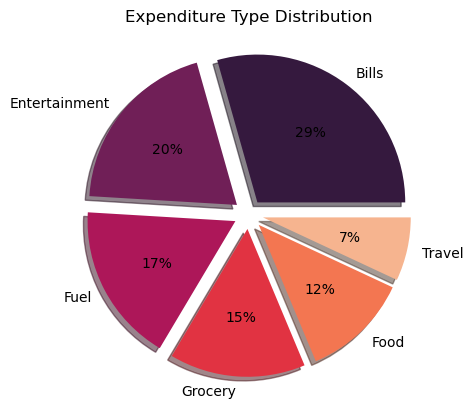

In [47]:
cc['Exp Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=sns.color_palette('rocket'),shadow= True, explode=(0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Expenditure Type Distribution')
plt.ylabel('')
plt.show()

In [48]:
cc.head() 
     

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Total_Revenue,Week_No.
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0,19742.21,1
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0,1506.44,1
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0,1789.58,1
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0,4426.40,1
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1,5693.87,1


# 11. Interest Earned by Category

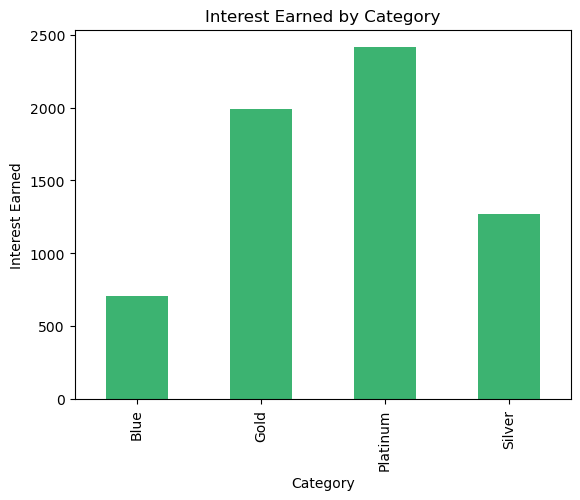

In [49]:
cc.groupby('Card_Category')['Interest_Earned'].mean().plot(kind='bar', color='mediumseagreen')
plt.title('Interest Earned by Category')
plt.xlabel('Category')
plt.ylabel('Interest Earned')
plt.show()

# 12. Quarterly Total Revenue Trend

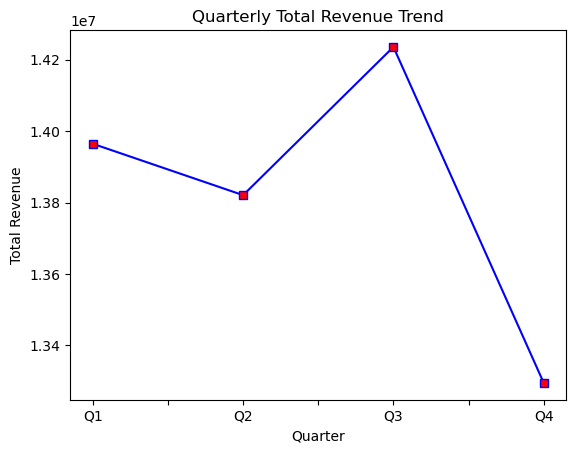

In [50]:
cc.groupby('Qtr')['Total_Revenue'].sum().plot(kind='line',marker='s',color= 'blue', mfc='red')
plt.title('Quarterly Total Revenue Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.show()

# 13. Interest Earned vs. Total Revolving Balance

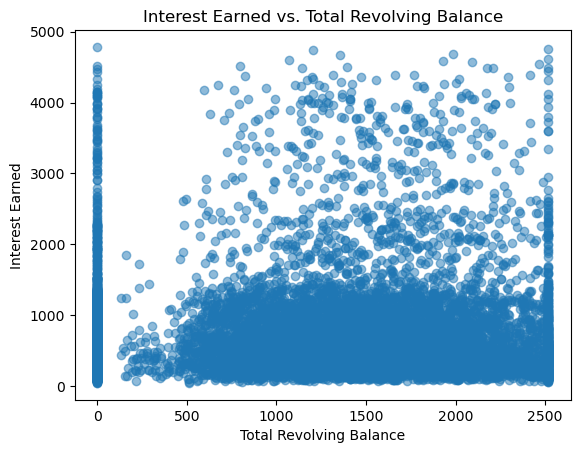

In [52]:
plt.scatter(cc['Total_Revolving_Bal'], cc['Interest_Earned'], alpha=0.5)
plt.title('Interest Earned vs. Total Revolving Balance')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Interest Earned')
plt.show()

# 14. Correlation Matrix

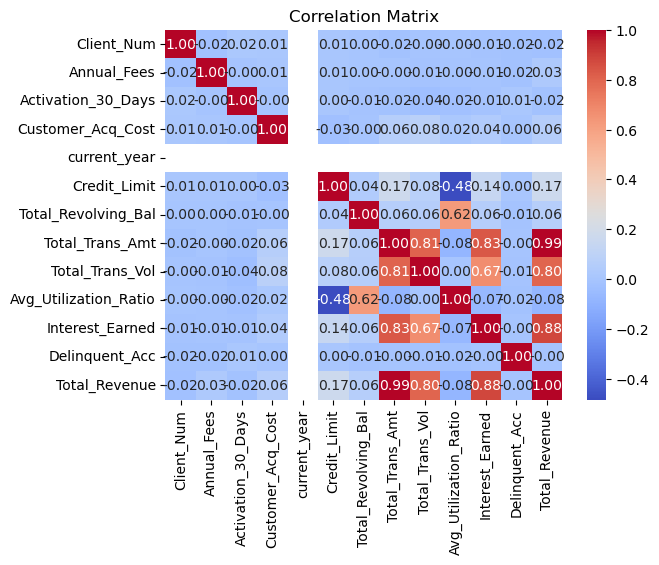

In [53]:
numeric_cc = cc.select_dtypes(include='number')

corr = numeric_cc.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()